# Network analysis
# Giacomo Saccaggi
# Gennaio 2020




## Caricamento dei dati

In [1]:
import networkx as nx
import networkx.convert_matrix as nxm

import pandas as pd

dati = pd.read_csv (r'C:/Users/gieck/Desktop/file da caricare/from_to.csv')
print (dati)
info = pd.read_csv (r'C:/Users/gieck/Desktop/file da caricare/info.csv')
print (info)


df = dati.pivot_table(index=['From','To'], values=['To'], aggfunc=['count'])
print (df)

     Unnamed: 0 From To
0             1    E  A
1             2    D  B
2             3    D  E
3             4    C  B
4             5    C  B
..          ...  ... ..
245         246    B  A
246         247    B  A
247         248    E  D
248         249    D  E
249         250    B  E

[250 rows x 3 columns]
   Unnamed: 0 Node  Age Department Job
0           1    A   35         d1  w1
1           2    B   24         d1  w2
2           3    C   29         d2  w3
3           4    D   45         d2  w1
4           5    E   40         d3  w2
5           6    F   53         d3  w4
             count
        Unnamed: 0
From To           
A    B          23
     C          14
     D          13
     E          11
B    A           5
     C          17
     D           8
     E          12
C    A           7
     B          11
     D          21
     E          11
D    A           7
     B          15
     C          12
     E          16
E    A          10
     B          11
     C          

## Creare Network

In [2]:

G = nx.DiGraph()

#aggiungere nodi
for i in range(len(info['Node'])):
    G.add_node(info['Node'][i])


#aggiungere edge
for i in range(len(df.index)):
    G.add_edge(df.index[i][0], df.index[i][1],weight=df.ix[df.index[i]][0])

# aggiungere attributi
nx.set_node_attributes(G, info['Age'], 'Age')
nx.set_node_attributes(G, info['Department'], 'Department')
nx.set_node_attributes(G, info['Job'], 'Job')

print(G)

C:\Users\gieck\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


# Calcolo Misure

In [3]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.7666666666666667


In [4]:
A_B_path = nx.shortest_path(G, source="A", target="B")

print("Shortest path between A and B:", A_B_path)

Shortest path between A and B: ['A', 'B']


In [5]:
print("Length of that path:", len(A_B_path)-1)

Length of that path: 1


In [6]:
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.9142857142857143



## Degree (Grado)

La misura più semplice di centralità in un social network è il grado. Esso è il modo più semplice e più comune di trovare nodi importanti. Il grado di un nodo è la somma dei bordi. Se, ad esempio, un nodo ha tre linee che si estendono da esso ad altri nodi, il suo grado è tre. 

Esistono due tipi di centralità dei gradi: indegree e outdegree.

- Indegree è il conteggio del numero totale di connessioni in entrata a un nodo. Nel linguaggio dell'amicizia, l'indegree può essere pensato come centralità della "popolarità". Il nodo è popolare perché molti altri nodi lo nominano come nodo con cui hanno un certo tipo di relazione.
- Outdegree è il numero totale di connessioni in uscita da un nodo. Il livello esterno può essere considerato come il livello di gregarietà di un nodo. I nodi con livelli più alti hanno molte connessioni in uscita. Nei grafici diretti si possono distinguere indegree e outdegree, ma in un grafico non orientato (senza frecce) possiamo semplicemente misurare la centralità dei gradi.




>degree_centrality(G) Compute the degree centrality for nodes. <br>
in_degree_centrality(G) Compute the in-degree centrality for nodes.<br>
out_degree_centrality(G) Compute the out-degree centrality for nodes.

In [7]:
degree_dict = dict(G.degree(G.nodes()))
print(degree_dict)
nx.set_node_attributes(G, degree_dict, 'degree')

{'A': 8, 'B': 9, 'C': 9, 'D': 8, 'E': 9, 'F': 3}



## Closeness (Vicinanza)



La seconda misura che tratteremo si chiama Closeness. Ci sono anche altri nomi per questo; a volte si chiama centralità dell'accesso. In poche parole, Closeness centrality cattura la distanza media dal nodo focale a tutti gli altri nodi del social network. La rappresentazione matematica della vicinanza è la seguente:


$$ l_i = \frac{1}{n-1} \sum_j d_{i,j}  $$

Stiamo provando a calcolare la vicinanza del nodo a tutti gli altri nodi della rete; quindi la Prossimità. Il numeratore è la somma di tutte le distanze a coppie tra il nodo i e tutti gli altri nodi j (escluso i). La somma delle distanze viene quindi divisa per il numero totale di nodi nella rete $n$ sottratto per 1 (per regolare il conteggio per escludere il nodo i). Ora abbiamo lontananza, che è la distanza media del nodo i da tutti gli altri nodi della rete. Prendere il reciproco ci rende vicini.

$$ C_i = \frac{1}{l_i} = \frac{n-1}{\sum_j d_{i,j}} $$

In [8]:
closeness_dict = nx.closeness_centrality(G)
print(closeness_dict)
nx.set_node_attributes(G, closeness_dict, 'closeness')

{'A': 0.8333333333333334, 'B': 1.0, 'C': 1.0, 'D': 0.8333333333333334, 'E': 0.8333333333333334, 'F': 0.5555555555555556}



## Betweenness (intermediatezza [quanto un nodo è intermediario])

E' forse una delle più potenti misure di centralità ed è strettamente correlata all'idea di buchi strutturali. La distanza intermedia può essere calcolata come:

$$b_i = \sum_{s, t} w_{s,t}^{i} = \sum_{s, t} \frac{n_{s,t}^{i}}{n_{s,t}} $$

Betweenness è la misura con cui si capisce se un nodo funge da ponte tra altri nodi della rete. Viene calcolato osservando tutte le coppie di nodi nella rete ed esaminando la frequenza con cui i, il nodo focale, esiste sui percorsi più brevi tra i nodi j e k.

In termini piu semplici, è la misura in cui un nodo si trova su percorsi tra altri nodi. I nodi con un alto livello di intermittenza possono avere una notevole influenza all'interno di una rete in virtù del loro controllo sulle informazioni che passano tra gli altri. Sono anche quelli la cui rimozione dalla rete interromperà maggiormente le comunicazioni tra altri nodi perché si trovano sul maggior numero di percorsi seguiti dai messaggi.


In [9]:
betweenness_dict = nx.betweenness_centrality(G)
print(betweenness_dict)
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

{'A': 0.0, 'B': 0.07500000000000001, 'C': 0.07500000000000001, 'D': 0.0, 'E': 0.2, 'F': 0.0}


## Eigenvector (autovettori)

Una naturale estensione della centralità dei gradi è la centralità degli autovettori. La centralità in gradi conferisce un punto di centralità per ogni collegamento ricevuto da un nodo. Ma non tutti i vertici sono equivalenti: alcuni sono più rilevanti di altri e, ragionevolmente, le approvazioni da nodi importanti contano di più. La tesi di centralità dell'autovettore recita:
Un nodo è importante se è collegato da altri nodi importanti.
La centralità degli autovettori differisce dalla centralità in gradi: un nodo che riceve molti collegamenti non ha necessariamente una elevata centralità degli autovettori (è possibile che tutti i linker abbiano una centralità degli autovettori bassa o nulla). Inoltre, un nodo con elevata centralità di autovettore non è necessariamente fortemente collegato (il nodo potrebbe avere pochi ma importanti linker).


Sia $ A = (a_ {i, j}) $ la matrice di adiacenza di un grafico. La centralità dell'autovettore $ x_ {i} $ del nodo $ i $ è data da: $$ x_i = \frac {1} {\lambda} \sum_k a_ {k, i} \, x_k $$ 
dove $ \lambda \neq 0 $ è una costante. In forma di matrice abbiamo: 
$$ \lambda x = x A $$

Quindi il vettore di centralità $ x $ è l'autovettore sinistro della matrice di adiacenza $ A $ associato all'autovalore $ \lambda $. È saggio scegliere $ \lambda $ come autovalore più grande in valore assoluto della matrice $ A $. In virtù del teorema di Perron-Frobenius, questa scelta garantisce la seguente proprietà desiderabile: se la matrice $ A $ è irriducibile, o equivalentemente se il grafico è (fortemente) connesso, allora la soluzione di autovettore $ x $ è sia unica che positiva. Lascia che $ m (v) $ denoti la componente firmata della grandezza massima del vettore $ v $. Se esiste più di un componente massimo, lascia che $ m (v) $ sia il primo. Ad esempio, $ m (-3,3,2) = -3 $. Sia $ x ^ {(0)} $ un vettore arbitrario. Per $ k \geq 1 $:
calcola ripetutamente $ x ^ {(k)} = x ^ {(k-1)} A $;
normalizzare $ x ^ {(k)} = x ^ {(k)} / m (x ^ {(k)}) $;
fino a raggiungere la precisione desiderata. Ne segue che $ x ^ {(k)} $ converge all'autovettore dominante di $ A $ e $ m (x ^ {(k)}) $ converge all'autovalore dominante di $ A $. Se la matrice $ A $ è scarsa, ogni prodotto a matrice vettoriale può essere eseguito in tempo lineare nella dimensione del grafico.


Il metodo converge quando gli autovalori dominanti (il più grande) e quelli sub-dominanti (il secondo più grande) di $ A $, rispettivamente indicati con $ \lambda_1 $ e $ \lambda_2 $, sono separati, ovvero sono diversi in valore assoluto, quindi quando $ | \lambda_1 | > | \lambda_2 | $. Il tasso di convergenza è il tasso al quale $ (\lambda_2 / \lambda_1) ^ k $ va a $ 0 $. Quindi, se l'autovalore secondario sub-dominante è piccolo rispetto a quello dominante, il metodo converge rapidamente.


In [10]:
eigenvector_dict = nx.eigenvector_centrality(G) 
print(eigenvector_dict)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

{'A': 0.4361928751222206, 'B': 0.45709174038164013, 'C': 0.45709174038164013, 'D': 0.4361928751222206, 'E': 0.4361928751222206, 'F': 0.10649698975839275}


## Rappresentazione

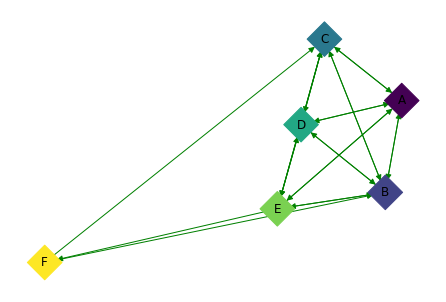

In [11]:
edges = G.edges()

weights = [G[u][v]['weight'] for u,v in edges]
options = {
    'node_size': 600,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}

nx.draw(G, widht=weights, arrows=True, node_shape='D',
     with_labels=True,
    edge_color='green',
    node_color=range(len(G)), **options)


## community

In [12]:
communities = community.best_partition(G)
print(communities)
nx.set_node_attributes(G, communities, 'modularity')

NameError: name 'community' is not defined